<h1>Uk Road Accidents Data Analytics</h1>
<hr>
<p>by:</p><h2>Harry Amante</h2>

In [1]:
import numpy as np 
import pandas as pd
from scipy.stats import f_oneway
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
road_acci_df = pd.read_csv('datasets\\uk_road_accident.csv')

In [3]:
road_acci_df

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


<h2>Descriptive Analysis</h2>

In [4]:
road_acci_df.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


<h2>Checking Null values</h2>

In [5]:
road_acci_df.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

<h2>Filling up Null Values</h2>

In [6]:
road_acci_df['Latitude'].mean()

np.float64(52.553865761110956)

In [7]:
road_acci_df['Latitude'] = road_acci_df['Latitude'].fillna(road_acci_df['Latitude'].mean())
road_acci_df['Longitude'] = road_acci_df['Longitude'].fillna(road_acci_df['Longitude'].mean())
road_acci_df['Road_Surface_Conditions'] = road_acci_df['Road_Surface_Conditions'].fillna(road_acci_df['Road_Surface_Conditions'].mode()[0])
road_acci_df['Road_Type'] = road_acci_df['Road_Type'].fillna(road_acci_df['Road_Type'].mode()[0])
road_acci_df['Urban_or_Rural_Area'] = road_acci_df['Urban_or_Rural_Area'].fillna(road_acci_df['Urban_or_Rural_Area'].mode()[0])
road_acci_df['Weather_Conditions'] = road_acci_df['Weather_Conditions'].fillna(road_acci_df['Weather_Conditions'].mode()[0])

In [8]:
road_acci_df.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

<h2>Changing Data Types</h2>

In [9]:
road_acci_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660679 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660679 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  660679 non-null  object 
 10  Road_Type                660679 non-null  object 
 11  Urban_or_Rural_Area      660679 non-null  object 
 12  Weather_Conditions       660679 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [10]:
road_acci_df['Index'] = road_acci_df['Index'].astype('category')
road_acci_df['Accident_Severity'] = road_acci_df['Accident_Severity'].astype('category')
road_acci_df['Accident Date'] = road_acci_df['Accident Date'].astype('category')
road_acci_df['Light_Conditions'] = road_acci_df['Light_Conditions'].astype('category')
road_acci_df['District Area'] = road_acci_df['District Area'].astype('category')
road_acci_df['Road_Surface_Conditions'] = road_acci_df['Road_Surface_Conditions'].astype('category')
road_acci_df['Road_Type'] = road_acci_df['Road_Type'].astype('category')
road_acci_df['Urban_or_Rural_Area'] = road_acci_df['Urban_or_Rural_Area'].astype('category')
road_acci_df['Weather_Conditions'] = road_acci_df['Weather_Conditions'].astype('category')
road_acci_df['Vehicle_Type'] = road_acci_df['Vehicle_Type'].astype('category')

In [11]:
road_acci_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   Index                    660679 non-null  category
 1   Accident_Severity        660679 non-null  category
 2   Accident Date            660679 non-null  category
 3   Latitude                 660679 non-null  float64 
 4   Light_Conditions         660679 non-null  category
 5   District Area            660679 non-null  category
 6   Longitude                660679 non-null  float64 
 7   Number_of_Casualties     660679 non-null  int64   
 8   Number_of_Vehicles       660679 non-null  int64   
 9   Road_Surface_Conditions  660679 non-null  category
 10  Road_Type                660679 non-null  category
 11  Urban_or_Rural_Area      660679 non-null  category
 12  Weather_Conditions       660679 non-null  category
 13  Vehicle_Type             660679 non-null  ca

<h2>Explanatory Data Analysis(EDA)</h2>

<h2>1. What is the total accidents number rocorded in the UK road accidents datasets?</h2>

In [12]:
road_acci_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   Index                    660679 non-null  category
 1   Accident_Severity        660679 non-null  category
 2   Accident Date            660679 non-null  category
 3   Latitude                 660679 non-null  float64 
 4   Light_Conditions         660679 non-null  category
 5   District Area            660679 non-null  category
 6   Longitude                660679 non-null  float64 
 7   Number_of_Casualties     660679 non-null  int64   
 8   Number_of_Vehicles       660679 non-null  int64   
 9   Road_Surface_Conditions  660679 non-null  category
 10  Road_Type                660679 non-null  category
 11  Urban_or_Rural_Area      660679 non-null  category
 12  Weather_Conditions       660679 non-null  category
 13  Vehicle_Type             660679 non-null  ca

<h2>Inight#1</h2>
<p>The total number of accidents recorded in the UK road accidents are 660679 .</p>

<hr>
<h2>2. What vehicles types has more accident recorded?</h2>

In [13]:

vehicle_acc = road_acci_df['Vehicle_Type'].mode()[0]
vehicle_acc

'Car'

<h2>Insight#2</h2>
<p>Base on the reults the vehicles that has the most recorded accident is "CAR"</p>

<h2>3. Which District area is the most prone on vehicle accident?</h2>

In [14]:
road_acci_df['District Area'].value_counts()

District Area
Birmingham            13491
Leeds                  8898
Manchester             6720
Bradford               6212
Sheffield              5710
                      ...  
Berwick-upon-Tweed      153
Teesdale                142
Shetland Islands        133
Orkney Islands          117
Clackmannanshire         91
Name: count, Length: 422, dtype: int64

<h2>Insight#3</h2>
<p>Base on the results the district area accident-prone is Birmingham with the record of 13491.</p>

<h2>4. During what weather condition and road surface conditions do accidents usually happen?</h2>

In [82]:
weather_surface_counts = (
    road_acci_df.groupby(["Weather_Conditions", "Road_Surface_Conditions"])
    .size()
    .reset_index(name="Accident_Count")
    .sort_values(by="Accident_Count", ascending=False)
)
weather_surface_counts.head(5)

,Weather_Conditions,Road_Surface_Conditions,Accident_Count
5,Fine no high winds,Dry,439733
9,Fine no high winds,Wet or damp,83169
29,Raining no high winds,Wet or damp,78087
7,Fine no high winds,Frost or ice,10878
19,Other,Wet or damp,9366


<h2>Insight#4</h2>
<p>Base on the results accidents usually happen when the weather conditions is "FINE NO WINDS" and the road surface conditions is "DRY".</p>

<h2>5. What is the average number of vehicles involved per accident?</h2>

In [16]:
round(road_acci_df['Number_of_Vehicles'].mean(),0)

np.float64(2.0)

<h2>Inight#5</h2>
<p>Base on the results the average number involve in accident is 2.</p>

<h2>6. What is the most common light condition  during accidents?</h2>

In [17]:
cmmn_light_con = road_acci_df['Light_Conditions'].value_counts()
cmmn_light_con

Light_Conditions
Daylight                       484880
Darkness - lights lit          129335
Darkness - no lighting          37437
Darkness - lighting unknown      6484
Darkness - lights unlit          2543
Name: count, dtype: int64

<h2>Insight#6</h2>
<p>The most common light conditions during accidents is "DAYLIGHT" with the total number of 484880 accidents .</p>

<h2>7. Which road type has the highest frequency of accidents?</h2>

In [18]:
road_type_acci = road_acci_df['Road_Type'].value_counts()
road_type_acci

Road_Type
Single carriageway    496663
Dual carriageway       99424
Roundabout             43992
One way street         13559
Slip road               7041
Name: count, dtype: int64

<h2>Insight#7</h2>
<p>The road type that has the highest frequency of accidents is "SINGLE CARRIAGEWAY" with the total number of 496663 accidents.</p>

<h2>8. What is the distribution of accident severity (slight, serious, fatal)?</h2>

In [19]:
acci_severi = road_acci_df['Accident_Severity'].value_counts()
acci_severi

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

<h2>Insight#8</h2>
<p>The detribution of accidents per accident severity are "SLIGHT: 563801", "SERIOUS: 88217", "FATALL: 8661"</p>

<H2>9. Where is the top 3 Districk area with a highest number of casualties recorded?</H2>

In [20]:
cslties_per_dis = road_acci_df.groupby(['District Area'])['Number_of_Casualties'].size().sort_values(ascending=False)

cslties_per_dis

District Area
Birmingham            13491
Leeds                  8898
Manchester             6720
Bradford               6212
Sheffield              5710
                      ...  
Berwick-upon-Tweed      153
Teesdale                142
Shetland Islands        133
Orkney Islands          117
Clackmannanshire         91
Name: Number_of_Casualties, Length: 422, dtype: int64

<h2>Insight#9</h2>
<p>The three district area with a high number of casulties are "Birmingham: 13491", "Birmingham: 8898", "Manchester: 6720". </p>

<h2>10. What type of vehicle has the highest fatal Accident Severity? </h2>

In [21]:
acci_sever = road_acci_df.groupby(['Vehicle_Type','Accident_Severity']).size().unstack()
acci_sever

Accident_Severity,Fatal,Serious,Slight
Vehicle_Type,,,
Agricultural vehicle,21,282,1644
Bus or coach (17 or more pass seats),325,3373,22180
Car,6577,66461,424954
Data missing or out of range,0,0,6
Goods 7.5 tonnes mgw and over,216,2321,14770
Goods over 3.5t. and under 7.5t,67,857,5172
Minibus (8 - 16 passenger seats),29,276,1671
Motorcycle 125cc and under,189,2031,13049
Motorcycle 50cc and under,95,1014,6494


<h2>Insight#10</h2>
<p>It seems out of recorded accidents <b>CAR</b> has more FATAL case accident severity with a total of 6577.</p>

<h2>11. What is the average number of casualties recorded per vehicle types
    accidents.</h2>

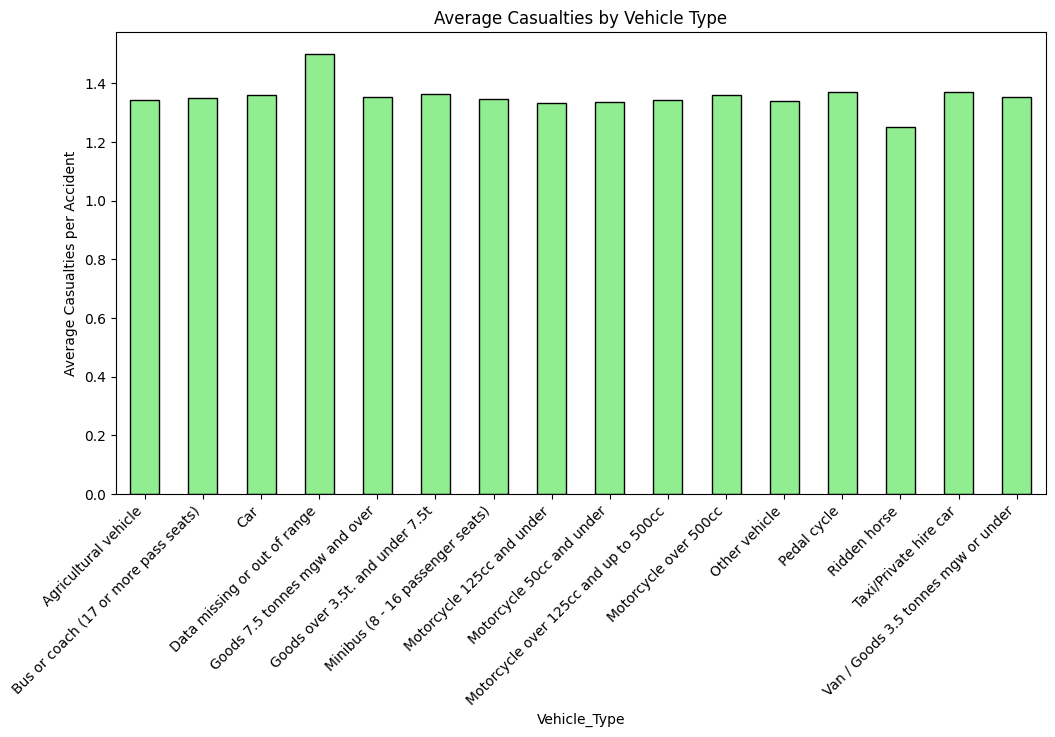

In [89]:
# avrg_car_caslt = road_acci_df[road_acci_df['Vehicle_Type'] == 'Car']['Number_of_Casualties'].mean()
# avrg_car_caslt

avrg_caslt_by_vehicle = road_acci_df.groupby("Vehicle_Type")["Number_of_Casualties"].mean()

avrg_caslt_by_vehicle.plot(kind="bar", color="lightgreen", edgecolor="black",figsize=(12,6))

plt.ylabel("Average Casualties per Accident")
plt.title("Average Casualties by Vehicle Type")
plt.xticks(rotation=45, ha="right")
plt.show()

<h2>Insight#11</h2>
<p>The average number of casualties recorded in car accidents is <b>1<b>.</p>

<h2>12. In what road surface conditions do car accidents usually happen?</h2>

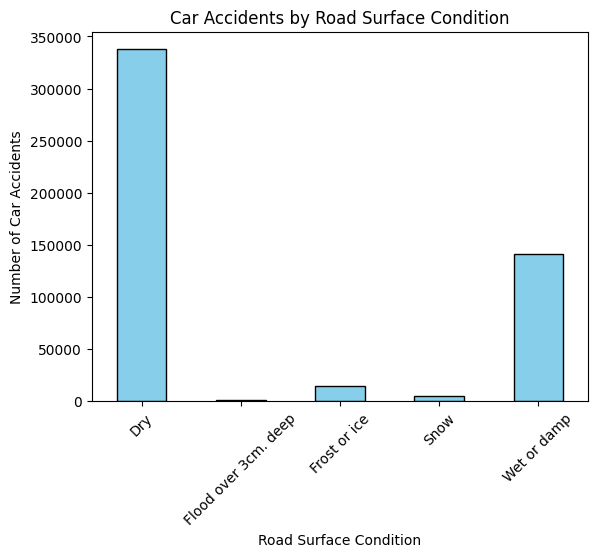

In [79]:
road_surfa =  road_acci_df.groupby(road_acci_df[road_acci_df['Vehicle_Type'] == 'Car']['Road_Surface_Conditions']).size()

road_surfa.plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel("Road Surface Condition")
plt.ylabel("Number of Car Accidents")
plt.title("Car Accidents by Road Surface Condition")
plt.xticks(rotation=45)
plt.show()

<h2>Insight#12</h2>
<p>According to the result 68% of car accidents usually happen on "DRY" road surface conditions.</p>

<h2>13. In which area usually do accidents happen?</h2>

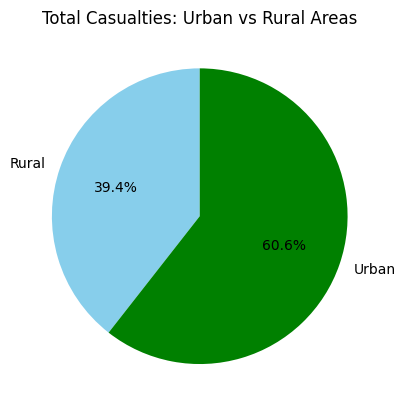

In [77]:
acci_area = (
    road_acci_df.groupby("Urban_or_Rural_Area")["Number_of_Casualties"]
    .sum().drop("Unallocated", errors="ignore") 
)

plt.pie(acci_area,
        labels=acci_area.index,      
        autopct='%1.1f%%',
        startangle=90,
        colors=['skyblue','green']) 

plt.title("Total Casualties: Urban vs Rural Areas")
plt.show()

<h2>Insight#13</h2>
<p>Base on the results 60.6% of accidents recorded usually happened in Urban Area.</p>

<h2>14.What types of vehicle has frequency accidents in Urban Area/ what severity and casualties in it?</h2>

In [25]:
urban_acci = road_acci_df.groupby(['Urban_or_Rural_Area','Vehicle_Type','Accident_Severity'])['Number_of_Casualties'].size()
urban_acci.unstack()

Accident_Severity                                          Fatal  Serious  \
Urban_or_Rural_Area Vehicle_Type                                            
Rural               Agricultural vehicle                      14      121   
                    Bus or coach (17 or more pass seats)     213     1372   
                    Car                                     4285    28494   
                    Data missing or out of range               0        0   
                    Goods 7.5 tonnes mgw and over            139      949   
                    Goods over 3.5t. and under 7.5t           41      361   
                    Minibus (8 - 16 passenger seats)          17      116   
                    Motorcycle 125cc and under               101      817   
                    Motorcycle 50cc and under                 52      431   
                    Motorcycle over 125cc and up to 500cc     64      399   
                    Motorcycle over 500cc                    222     1355   
                    Other vehicle                             44      321   
                    Pedal cycle                                4       13   
                    Ridden horse                               0        0   
                    Taxi/Private hire car                     99      717   
                    Van / Goods 3.5 tonnes mgw or under      306     1846   
Unallocated         Agricultural vehicle                       0        0   
                    Bus or coach (17 or more pass seats)       0        0   
                    Car                                        0        0   
                    Data missing or out of range               0        0   
                    Goods 7.5 tonnes mgw and over              0        0   
                    Goods over 3.5t. and under 7.5t            0        0   
                    Minibus (8 - 16 passenger seats)           0        0   
                    Motorcycle 125cc and under                 0        0   
                    Motorcycle 50cc and under                  0        0   
                    Motorcycle over 125cc and up to 500cc      0        0   
                    Motorcycle over 500cc                      0        0   
                    Other vehicle                              0        0   
                    Pedal cycle                                0        0   
                    Ridden horse                               0        0   
                    Taxi/Private hire car                      0        0   
                    Van / Goods 3.5 tonnes mgw or under        0        1   
Urban               Agricultural vehicle                       7      161   
                    Bus or coach (17 or more pass seats)     112     2001   
                    Car                                     2292    37967   
                    Data missing or out of range               0        0   
                    Goods 7.5 tonnes mgw and over             77     1372   
                    Goods over 3.5t. and under 7.5t           26      496   
                    Minibus (8 - 16 passenger seats)          12      160   
                    Motorcycle 125cc and under                88     1214   
                    Motorcycle 50cc and under                 43      583   
                    Motorcycle over 125cc and up to 500cc     41      615   
                    Motorcycle over 500cc                    117     2102   
                    Other vehicle                             26      446   
                    Pedal cycle                                2       26   
                    Ridden horse                               0        0   
                    Taxi/Private hire car                     56     1054   
                    Van / Goods 3.5 tonnes mgw or under      161     2707   

Accident_Severity                                          Slight  
Urban_or_Rural_Area Vehicle_Type                                   
Rural        

<h2>Insight#14</h2>
<p>It seems "Car" is also no.1 in road accidents recorded in urban area</p>

<h2>Inights#15</h2>
<p>It seems despite being a pedal cycle there is chance of accidents in urban area with a total number of 127 accidents.</p>

<h2>16. Which district area has recorded a more fatal accidents?</h2>

In [26]:
dsct_fatal = road_acci_df.groupby(['District Area','Accident_Severity'])['Number_of_Casualties'].size()
dsct_fatal.unstack()

Accident_Severity,Fatal,Serious,Slight
District Area,,,
Aberdeen City,12,239,1072
Aberdeenshire,66,463,1401
Adur,8,101,510
Allerdale,24,143,961
Alnwick,6,33,193
...,...,...,...
Wychavon,30,193,1138
Wycombe,20,216,1493
Wyre,15,186,1037


<h2>Inight#16</h2>
<p> It seem that <b>Aberdeenshire</b> has the most recorded fatal road accidents .</p>

In [27]:
road_acci_df['District Area'].mode()[0]

'Birmingham'

<h2>Insight#17</h2>
<p>Base in the previous reults despite 'Birmingham' being have more accidents record it's accidents is not most fatal.</p>

<h2>18. What are the average coordinates for each severity?</h2>

In [28]:
road_acci_df.groupby('Accident_Severity')[['Latitude','Longitude']].mean()


,Latitude,Longitude
Accident_Severity,,
Fatal,52.696000,-1.546123
Serious,52.637669,-1.426820
Slight,52.538570,-1.430132


<h2>Insight#18</h2>
<p>Base on the data fatal road accidents have a slightly higher average latitude and lower average longitude compared  to serious and slight accidents.
</p>

<ul>
    <li>Correlation</li>
    <li>>= 0.5 = true</li>
</ul>
<h2>19. Is there a correlation between the number of vehicles involved and Number of Casualties?</h2>

In [85]:
cor_acci = road_acci_df['Number_of_Vehicles'].corr(road_acci_df['Number_of_Casualties'])
cor_acci

np.float64(0.22888886126927557)

<h2>Insight#19</h2>
<p>there a weak correlation between the number of vehicles involved and Number of Casualties</p>

<h2>20.  Is There a correlation between number of vehicles and Casualties Severity?</h2>

In [30]:
road_acci_df['Accident_Severity'].unique()

['Serious', 'Slight', 'Fatal']
Categories (3, object): ['Fatal', 'Serious', 'Slight']

In [31]:
road_acci_df[road_acci_df['Accident_Severity'] == 'Serious']['Number_of_Vehicles']

0         2
1         2
2         3
3         4
5         3
         ..
660629    2
660645    1
660672    2
660677    2
660678    1
Name: Number_of_Vehicles, Length: 88217, dtype: int64

In [32]:
road_acci_df[road_acci_df['Accident_Severity'] == 'Slight']['Number_of_Vehicles']

4         2
8         2
9         2
13        2
14        1
         ..
660671    1
660673    2
660674    1
660675    1
660676    3
Name: Number_of_Vehicles, Length: 563801, dtype: int64

In [33]:
road_acci_df[road_acci_df['Accident_Severity'] == 'Fatal']['Number_of_Vehicles']

7         2
11        2
20        1
21        1
717       2
         ..
660470    1
660519    1
660565    1
660581    1
660627    1
Name: Number_of_Vehicles, Length: 8661, dtype: int64

In [34]:
f_oneway(road_acci_df[road_acci_df['Accident_Severity'] == 'Serious']['Number_of_Vehicles'],road_acci_df[road_acci_df['Accident_Severity'] == 'Slight']['Number_of_Vehicles'],road_acci_df[road_acci_df['Accident_Severity'] == 'Fatal']['Number_of_Vehicles'])

F_onewayResult(statistic=np.float64(2383.6601993258646), pvalue=np.float64(0.0))

<h2>Insight#20</h2>
<p>I think there is none correlation between the two.</p>

In [35]:
road_acci_df['Accident Date'] = pd.to_datetime(road_acci_df['Accident Date'],dayfirst=True, errors='coerce')

In [36]:
road_acci_df.dtypes

Index                            category
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                 category
District Area                    category
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
dtype: object

In [37]:
#Create Column for Month,Day, Year

road_acci_df['Year'] = road_acci_df['Accident Date'].dt.year
road_acci_df['Day'] = road_acci_df['Accident Date'].dt.day
road_acci_df['Day_Name'] = road_acci_df['Accident Date'].dt.day_name()
road_acci_df['Day_of_Week'] = road_acci_df['Accident Date'].dt.dayofweek
road_acci_df['Month'] = road_acci_df['Accident Date'].dt.month


In [38]:
road_acci_df["Accident Date"] =  road_acci_df["Accident Date"].fillna(road_acci_df["Accident Date"] .mode()[0])
road_acci_df['Month'] =  road_acci_df['Month'].fillna(road_acci_df['Month'] .mode()[0])
road_acci_df['Year'] =  road_acci_df['Year'].fillna(road_acci_df['Year'] .mode()[0])
road_acci_df['Day'] =  road_acci_df['Day'].fillna(road_acci_df['Day'] .mode()[0])
road_acci_df['Day_Name'] =  road_acci_df['Day'].fillna(road_acci_df['Day_Name'] .mode()[0])
road_acci_df['Day_of_Week'] =  road_acci_df['Day_of_Week'].fillna(road_acci_df['Day_of_Week'] .mode()[0])
road_acci_df['Month'] = road_acci_df['Month'].astype('category') 

<h2>21. Which month records the highest number of accidents?</h2>

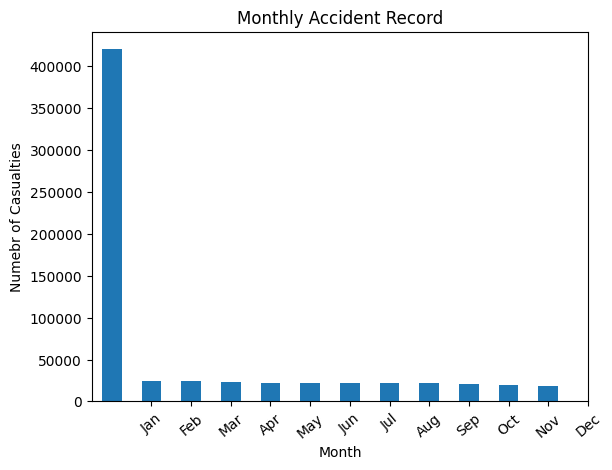

In [72]:
month_counts = road_acci_df["Month"].value_counts()
month_counts.plot(kind='bar',title='Monthly Accident Record')
plt.xlabel('Month')
plt.ylabel('Numebr of Casualties')
plt.xticks(range(1,13),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=40)
plt.show()

<h2>Insight#21</h2>
<p>The month with a high records of number of accidents is (11)"November" with total numbers of 419912</p>

<h2>22. Which day of week record highest number of road acccidents</h2>

In [51]:
new_df = road_acci_df[road_acci_df['Day_of_Week'] != 5]


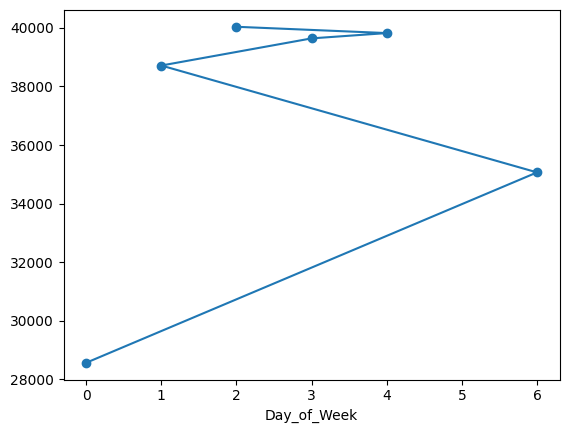

In [52]:
day_weeks = new_df['Day_of_Week'].value_counts()
day_weeks.plot(marker='o')
plt.show()

<h2>Inight#22</h2>
<p>Base on the data in some reasons every (5)'SATURDAY' the number of accidents increases.</p>

<h2>23. In which year do road accidents happened the most?</h2>

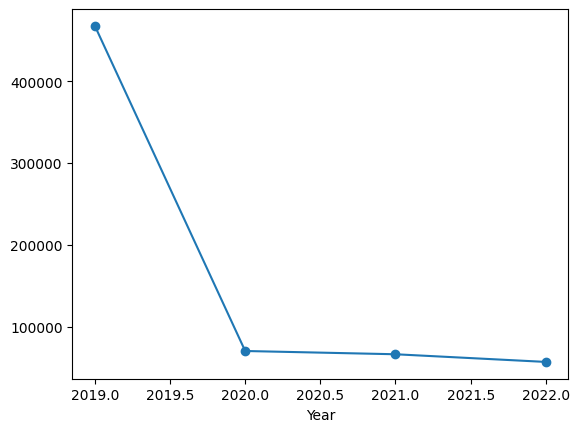

In [54]:
year_acci = road_acci_df['Year'].value_counts()
year_acci.plot(marker='o')
plt.show()


<h2>Insight#23</h2>
<p>Base on the data 71% of road accidents recorded in 2019.</p>

<h2>24. In which moth accident happen the most per detrict area?</h2>

In [65]:
month_acci = road_acci_df.groupby(['District Area','Month'])['Number_of_Casualties'].size().unstack()
month_acci.head(12)
month_acci

Month,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
District Area,,,,,,,,,,,,
Aberdeen City,27,56,50,43,53,45,41,43,36,47,826,56
Aberdeenshire,49,55,66,53,52,69,61,76,64,68,1238,79
Adur,19,20,27,27,26,17,26,23,18,23,379,14
Allerdale,26,41,33,29,40,38,34,33,40,51,721,42
Alnwick,7,15,6,7,6,7,9,12,7,12,135,9
...,...,...,...,...,...,...,...,...,...,...,...,...
Wychavon,40,48,45,56,54,40,48,44,40,48,851,47
Wycombe,46,56,61,46,53,51,67,51,62,71,1106,59
Wyre,36,42,47,46,37,35,36,45,32,38,793,51


<h2>Insight#24</h2>
<p>Base on the data most of accident numbers vary significantly between district area .</p>

<h2>Insight#25</h2>
<p>Therefore some districts like Alnwick, consistently report a lower accident numbers accross all months.</p>